# Homework 4

## FINM 37500: Fixed Income Derivatives

### Mark Hendricks

#### Winter 2024

***

In [1]:
import numpy as np
import pandas as pd

import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

from scipy.optimize import fsolve
from scipy.stats import norm

# Data

### Note
This homework continues with the data from `Homework 3`.

In [2]:
import_path2 = "/Users/adriana/Jupyter_Files/FINM37500_Fixed_Income_Derivatives/data/swaption_vol_data.xlsx"

swaption = pd.read_excel(import_path2,sheet_name = 'bloomberg vcub')
swaption

,reference,instrument,model,date,expiration,tenor,-200,-100,-50,-25,0,25,50,100,200
0,SOFR,swaption,black,2024-02-20,1,4,54.54,40.37,35.94,34.23,32.83,31.71,30.86,29.83,29.54


In [3]:
import_path1 = "/Users/adriana/Jupyter_Files/FINM37500_Fixed_Income_Derivatives/data/cap_quotes_2024-02-20.xlsx"

quotes_cap = pd.read_excel(import_path1,sheet_name = 'cap', index_col = 0)
maturities_cap = pd.DataFrame(quotes_cap.iloc[0,0:])
quotes_cap = quotes_cap.iloc[1:,:]
quotes_cap.index = pd.to_datetime(quotes_cap.index)
quotes_cap.head()

,USCNSQ1 SMKO Curncy,USCNSQ2 SMKO Curncy,USCNSQ3 SMKO Curncy,USCNSQ4 SMKO Curncy,USCNSQ5 SMKO Curncy,USCNSQ6 SMKO Curncy,USCNSQ7 SMKO Curncy,USCNSQ8 SMKO Curncy,USCNSQ9 SMKO Curncy,USCNSQ10 SMKO Curncy
date,,,,,,,,,,
2022-03-17,127.3,108.5,109.9,108.5,107.3,104.3,101.0,97.7,95.2,93.2
2022-03-18,96.2,104.9,108.0,108.5,108.0,105.0,101.8,98.3,95.4,93.4
2022-03-21,96.2,105.0,108.1,108.5,107.9,105.0,101.7,98.2,95.4,93.4
2022-03-22,75.1,108.3,115.2,115.3,113.6,109.9,106.3,102.8,99.9,97.5
2022-03-23,94.1,111.0,117.9,117.1,114.6,110.7,107.2,103.5,100.5,98.1


In [4]:
quotes_sofr = pd.read_excel(import_path1,sheet_name = 'sofr', index_col = 0)
maturities_sofr = pd.DataFrame(quotes_sofr.iloc[0,0:])
quotes_sofr = quotes_sofr.iloc[1:,:]
quotes_sofr.index = pd.to_datetime(quotes_sofr.index)
quotes_sofr.head()

,USOSFRC Curncy,USOSFRF Curncy,USOSFRI Curncy,USOSFR1 Curncy,USOSFR1C Curncy,USOSFR1F Curncy,USOSFR1I Curncy,USOSFR2 Curncy,USOSFR2C Curncy,USOSFR2F Curncy,...,USOSFR4F Curncy,USOSFR5 Curncy,USOSFR6 Curncy,USOSFR7 Curncy,USOSFR8 Curncy,USOSFR9 Curncy,USOSFR10F Curncy,USOSFR10 Curncy,USOSFR10C Curncy,USOSFR10I Curncy
date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.0907,0.2000,0.3067,0.4060,0.4970,0.5920,0.6795,0.7629,0.8325,0.8910,...,1.1550,1.2022,1.2636,1.3149,1.3568,1.3909,1.4237,1.4237,1.4237,1.4237
2022-01-04,0.0908,0.1974,0.2981,0.3949,0.4875,0.5807,0.6670,0.7515,0.8215,0.8820,...,1.1560,1.1996,1.2663,1.3227,1.3668,1.4028,1.4370,1.4370,1.4370,1.4370
2022-01-05,0.0982,0.2180,0.3313,0.4400,0.5390,0.6395,0.7355,0.8203,0.8930,0.9525,...,1.2295,1.2746,1.3410,1.3943,1.4348,1.4678,1.4994,1.4994,1.4994,1.4994
2022-01-06,0.1117,0.2390,0.3569,0.4630,0.5655,0.6670,0.7650,0.8530,0.9270,0.9930,...,1.2745,1.3161,1.3794,1.4286,1.4654,1.4946,1.5240,1.5240,1.5240,1.5240
2022-01-07,0.1143,0.2373,0.3505,0.4584,0.5625,0.6660,0.7665,0.8598,0.9365,1.0090,...,1.3020,1.3440,1.4133,1.4665,1.5058,1.5354,1.5647,1.5647,1.5647,1.5647


### Swaption Vol Data

The file `data/swaption_vol_data_2024-02-20.xlsx` has market data on the implied volatility skews for swaptions. Note that it has several columns:
* `expry`: expiration of the swaption
* `tenor`: tenor of the underlying swap
* `model`: the model by which the volatility is quoted. (All are Black.)
* `-200`, `-100`, etc.: The strike listed as difference from ATM strike (bps). Note that ATM is considered to be the **forward swap rate** which you can calculate.

Your data: ywill use a single row of this data for the `1x4` swaption.
* date: `2024-02-20`
* expiration: 1yr
* tenor: 4yrs

As in `Homework 3`, you will need the forward swap value and the actual strikes being referred to in the provided data (which quotes relative strikes.)

# 1. SABR Volatility Modeling

**Compute the forward swap price**

In [5]:
def calc_fwdswaprate(discounts, Tfwd, Tswap, freqswap):
    freqdisc = round(1/discounts.index.to_series().diff().mean())
    step = round(freqdisc / freqswap)
    
    periods_fwd = discounts.index.get_loc(Tfwd)
    periods_swap = discounts.index.get_loc(Tswap)
    # get exclusive of left and inclusive of right by shifting both by 1
    periods_fwd += step
    periods_swap += 1
    
    fwdswaprate = freqswap * (discounts.loc[Tfwd] - discounts.loc[Tswap]) / discounts.iloc[periods_fwd:periods_swap:step].sum()
    return fwdswaprate

In [6]:
freqcurve = 4
freqswap = 1

expry = 1
tenor = 4

Topt = expry
Tswap = expry + tenor
freqswap = freqswap

In [8]:
import_path = "/Users/adriana/Jupyter_Files/FINM37500_Fixed_Income_Derivatives/data/cap_curves_2024-02-20.xlsx"
curves = pd.read_excel(import_path,sheet_name = 'rate curves 2024-02-20', index_col = 0)
curves.head()

fwdrate = curves['forwards'][Topt]
fwdswap = calc_fwdswaprate(curves['discounts'], Topt, Tswap, freqswap=freqswap)
print(f'The forward swap rate is {fwdswap:.2%}')

The forward swap rate is 3.72%


In [13]:
swaption.index = ['implied vol']

strikerange = np.array(swaption.columns[-9:].tolist())
volatility = swaption[strikerange]
volatility /= 100

strikes = fwdswap + strikerange/100/100

idstrikeATM = np.where(strikerange == 0)[0][0]

cap_vol = curves.loc[Topt,'fwd vols']

strikeATM = strikes[idstrikeATM]
volATM = volatility.iloc[0,idstrikeATM]

In [25]:
def blacks_formula(T,vol,strike,fwd,discount=1,isCall=True):
        
    sigT = vol * np.sqrt(T)
    d1 = (1/sigT) * np.log(fwd/strike) + .5*sigT
    d2 = d1-sigT
    
    if isCall:
        val = discount * (fwd * norm.cdf(d1) - strike * norm.cdf(d2))
    else:
        val = discount * (strike * norm.cdf(-d2) - fwd * norm.cdf(-d1))
    return val

In [26]:
period_fwd = curves.index.get_loc(Topt)
period_swap = curves.index.get_loc(Tswap)+1

step = round(freqcurve / freqswap)

discount = curves['discounts'].iloc[period_fwd+step : period_swap : step].sum()

blacks_quotes = volatility.copy()
blacks_quotes.loc['price'] = 100 * blacks_formula(Topt,volatility,strikes,fwdswap,discount,isCall=True)[0]
blacks_quotes.loc['strike'] = strikes
blacks_quotes = blacks_quotes.loc[['strike','implied vol','price']]

blacks_quotes.style.format('{:.4f}')

,-200,-100,-50,-25,0,25,50,100,200
strike,0.0172,0.0272,0.0322,0.0347,0.0372,0.0397,0.0422,0.0472,0.0572
implied vol,0.5454,0.4037,0.3594,0.3423,0.3283,0.3171,0.3086,0.2983,0.2954
price,7.1185,4.0306,2.7256,2.1687,1.6874,1.2855,0.9625,0.5215,0.1524


Use the quoted volatility skew to fit a SABR model.
* Throughout, parameterize, `beta=.75`.

In [10]:
doSLIM = False
BETA = 0.75
F = fwdswap-1e-8

## 1.1
Estimate $(\alpha,\rho,\nu)$ via the SABR formula. Feel free to use the `sabr` function in `cmds/volskew.py`.

Report the values of these parameters.

In [15]:
from scipy.optimize import fsolve
from scipy.optimize import minimize

from pandas.tseries.offsets import Day, BDay
from datetime import date

import numpy.polynomial.polynomial as poly

def zfun(beta, nu, alpha, f, K):
    return (nu/alpha) * (f*K)**((1-beta)/2) * np.log(f/K)

def chi(z, rho):
    return np.log((np.sqrt(1-2*rho*z + z**2) + z - rho) / (1-rho))

def sabr(beta,nu,rho,alpha,f,K,T):
   
    squareNUM = (((1-beta)**2)/24) * (alpha**2)/((f*K)**(1-beta)) + (1/4) * (rho*beta*nu*alpha)/((f*K)**((1-beta)/2))+((2-3*rho**2)/24)*nu**2
    NUM = alpha * (1 + squareNUM * T)
    squareDEN = 1 + (((1-beta)**2)/24) * (np.log(f/K)**2) + (((1-beta)**4)/1920) * (np.log(f/K)**4)
    DEN = (f*K)**((1-beta)/2) * squareDEN
    z = zfun(beta,nu,alpha,f,K)        
    sigmaB = (NUM/DEN) * (z/chi(z,rho))
    
    if (type(K) is np.float64) | (type(K) is float):
        if f==K:
            sigmaB = sabrATM(beta,nu,rho,alpha,f,K,T)
    else:
        mask = f==K
        sigmaB[mask] = sabrATM(beta,nu,rho,alpha,f,K[mask],T)
        
    return sigmaB

def sabrATM(beta,nu,rho,alpha,f,K,T):
    brack = (((1-beta)**2)/24) * ((alpha**2)/(f**(2-2*beta))) + (rho * beta * nu * alpha)/(4*f**(1-beta)) + ((2-3*rho**2)/24) * nu**2
    
    sigma = alpha * (1+brack*T) / f**(1-beta)

    return sigma

def solve_alpha(beta, nu, rho, T, volATM, f):
    coefs = np.ones(4)
    coefs[3] = (1-beta)**2 * T / (24*f**(2-2*beta))
    coefs[2] = rho * beta * nu * T / (4*f**(1-beta))
    coefs[1] = 1 + (2-3*rho**2) * nu**2 * T / 24
    coefs[0] = -volATM * f**(1-beta)

    roots = poly.polyroots(coefs)
    alpha = np.real(roots[np.abs(np.imag(roots))<1e-6][0])
    return alpha

def sabr_slim(beta,nu,rho,f,K,T,volATM):

    alpha = solve_alpha(beta, nu, rho, T, volATM, f)
    
    squareNUM = (((1-beta)**2)/24) * (alpha**2)/((f*K)**(1-beta)) + (1/4) * (rho*beta*nu*alpha)/((f*K)**((1-beta)/2))+((2-3*rho**2)/24)*nu**2
    NUM = alpha * (1 + squareNUM * T)
    squareDEN = 1 + (((1-beta)**2)/24) * ((np.log(f/K))**2) + (((1-beta)**4)/1920) * ((np.log(f/K))**4)
    DEN = (f*K)**((1-beta)/2) * squareDEN
    z = zfun(beta,nu,alpha,f,K)
    sigmaB = (NUM/DEN) * (z/chi(z,rho))
        
    if (type(K) is np.float64) | (type(K) is float):
        if (f==K):
            sigmaB = sabrATM(beta,nu,rho,alpha,f,K,T)
    else:
        mask = f==K
        sigmaB[mask] = sabrATM(beta,nu,rho,alpha,f,K[mask],T)
        
    return sigmaB


In [17]:
def obj_fun(xargs):
    nu = xargs[0]
    rho = xargs[1]
    alpha = xargs[2]
    
    ivolSABR = np.zeros(len(strikes))
    
    for i,strike in enumerate(strikes):
         ivolSABR[i] = sabr(BETA,nu,rho,alpha,F,strike,Topt)
    
    error = ((ivolSABR - volatility.values)**2).sum()
    
    return error


def obj_fun_slim(xargs):
    nu = xargs[0]
    rho = xargs[1]
    ivolSABR = np.zeros(len(strikes))
    
    for i,strike in enumerate(strikes):
         ivolSABR[i] = sabr_slim(BETA,nu,rho,F,strike,Topt,volATM)
    
    error = ((ivolSABR - volatility.values)**2).sum()
    
    return error

In [18]:
if not doSLIM:
    x0 = np.array([.6,0,.1])
    fun = obj_fun
else:
    fun = obj_fun_slim
    x0 = np.array([.6,0,.1])

optim = minimize(fun,x0)
xstar = optim.x
nustar = xstar[0]
rhostar = xstar[1]
   
if doSLIM:
    alphastar = solve_alpha(BETA,nustar,rhostar,Topt,volATM,F)
    ivolSABR = sabr_slim(BETA,nustar,rhostar,F,strikes,Topt,volATM)
else:
    alphastar = xstar[2]
    ivolSABR = sabr(BETA,nustar,rhostar,alphastar,F,strikes,Topt)
    
error = optim.fun

In [22]:
param = pd.DataFrame([BETA,alphastar,nustar,rhostar,error],index=['beta ($\\beta$)','alpha ($\\alpha$)','nu ($\\nu$)','rho ($\\rho$)','fit error'],columns=['SABR Parameters']).style.format('{:.4f}')
param

,SABR Parameters
beta ($\beta$),0.7500
alpha ($\alpha$),0.1415
nu ($\nu$),0.7930
rho ($\rho$),-0.4282
fit error,0.0001


## 1.2
Create a grid of strikes of `[.0025, .09]`, with grid spacing of `10bps`, (.0010).

Use the SABR model parameterized above to calculate the volatility for each of these strikes.

* Plot the SABR curve, and also include the market quotes in the plot.

* Conceptually, does the SABR curve fit these points well? Perfectly?

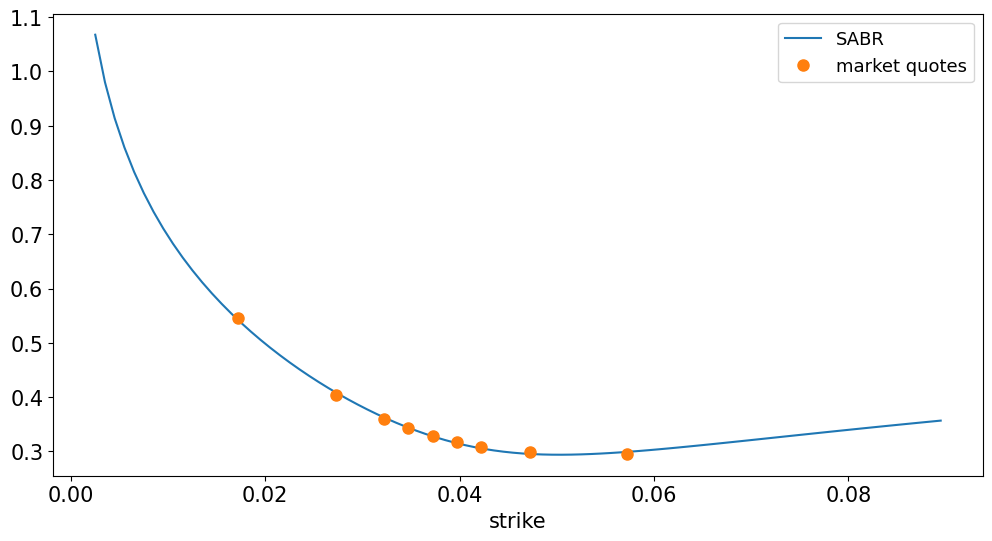

In [24]:
strikegrid = np.arange(.0025,.09,.0010)
if doSLIM:
    ivolgrid = sabr_slim(BETA,nustar,rhostar,F,strikegrid,Topt,volATM)
else:
    ivolgrid = sabr(BETA,nustar,rhostar,alphastar,F,strikegrid,Topt)
    
sabrcurve = pd.DataFrame(ivolgrid,index=strikegrid,columns=['SABR'])

volquotes = volatility.copy()
volquotes.loc['strike'] = strikes
volquotes = volquotes.T.set_index('strike').rename(columns={'implied vol':'market quotes'})

fig, ax = plt.subplots()
sabrcurve.plot(ax=ax)
volquotes.plot(linestyle='',marker='o',markersize=8,ax=ax)
plt.legend();

## 1.3
Suppose we want to price the `1y4y` swaption but with a far out-of-the-money strike of `5%`. 

* Use the SABR vol at this strike to price the swaption.

(Note that this strike is far outside the range for which we have market quotes, and even if we do have quotes, they likely are not liquid on a given day.)



In [27]:
NEWSTRIKE = .05
N = 100

if doSLIM:
    newvol = sabr_slim(BETA,nustar,rhostar,F,NEWSTRIKE,Topt,volATM)
else:
    newvol = sabr(BETA,nustar,rhostar,alphastar,F,NEWSTRIKE,Topt)

newprice = N * blacks_formula(Topt,newvol,NEWSTRIKE,fwdswap,discount,isCall=True)
display(f'Price of the OTM swaption at strike {NEWSTRIKE:.2%} is ${newprice:.4f}.')

'Price of the OTM swaption at strike 5.00% is $0.3624.'

## 1.4

Use the ATM implied volatility to fit $\alpha$, (sometimes denoted $\sigma_0$.) That is, for any choice of $(\rho,\nu)$, solve a quadratic equation to get $\alpha$ as a function of those two parameters, along with $\beta$, which is at its selected (not estimated) value.

Recall that we have a simple relationship between ATM vol and $\alpha$.
$$\sigma_\text{ATM} = \alpha\frac{B}{F^{1-\beta}}$$
where $B$ is defined in the discussion note. It is a quadratic expression of $\alpha$ along with $(\beta,\rho,\nu)$.

This decouples the optimization. We solve for $(\rho,\nu)$ and $\alpha$ as a function of the other two parameters.

Consider using the function `sabrATM` in `cmds/volskew.py`.

In [28]:
doSLIM = True
BETA = 0.75
F = fwdswap-1e-8

param = pd.DataFrame([BETA,alphastar,nustar,rhostar,error],index=['beta ($\\beta$)','alpha ($\\alpha$)','nu ($\\nu$)','rho ($\\rho$)','fit error'],columns=['SABR Parameters']).style.format('{:.4f}')
display(param)

,SABR Parameters
beta ($\beta$),0.7500
alpha ($\alpha$),0.1415
nu ($\nu$),0.7930
rho ($\rho$),-0.4282
fit error,0.0001


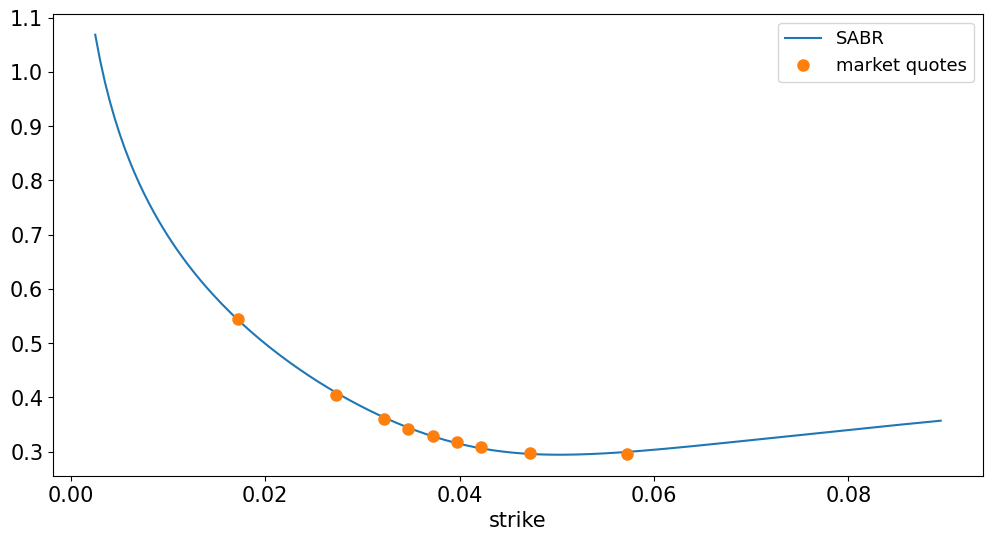

In [30]:
strikegrid = np.arange(.0025,.09,.0010)
if doSLIM:
    ivolgrid = sabr_slim(BETA,nustar,rhostar,F,strikegrid,Topt,volATM)
else:
    ivolgrid = sabr(BETA,nustar,rhostar,alphastar,F,strikegrid,Topt)
    
sabrcurve = pd.DataFrame(ivolgrid,index=strikegrid,columns=['SABR'])

volquotes = volatility.copy()
volquotes.loc['strike'] = strikes
volquotes = volquotes.T.set_index('strike').rename(columns={'implied vol':'market quotes'})

fig, ax = plt.subplots()
sabrcurve.plot(ax=ax)
volquotes.plot(linestyle='',marker='o',markersize=8,ax=ax)
plt.legend();

In [31]:
NEWSTRIKE = .05
N = 100

if doSLIM:
    newvol = sabr_slim(BETA,nustar,rhostar,F,NEWSTRIKE,Topt,volATM)
else:
    newvol = sabr(BETA,nustar,rhostar,alphastar,F,NEWSTRIKE,Topt)

newprice = N * blacks_formula(Topt,newvol,NEWSTRIKE,fwdswap,discount,isCall=True)
display(f'Price of the OTM swaption at strike {NEWSTRIKE:.2%} is ${newprice:.4f}.')

'Price of the OTM swaption at strike 5.00% is $0.3641.'

***

# 2. SABR and Risk Management

Consider how an **increase** of `50bps` in the underlying rate impacts the price of the `1y4y` ATM swaption.

Here, we are assuming that
* the rate change will impact the forward swap rate directly, one-for-one with other rates.
* the shift happens on `Feb 21, 2024`.

Of course, in reality, a rate change
* may price in early to some degree if it is expected
* may not impact the forward swap rate one-for-one. We would need to model how the discount curve changes and what that change (level, slope, curvature?) would do to the forward swap rate.

## 2.1

Use Black's equation to re-price the `1y4y` swaption with
* the same ATM volatility
* an underlying (forward swap) rate increased `50bps`.
* the same time-to-maturities. (We should decrease these all by 1/365, but we focus here on the delta effects rather than the theta. And it would be a small impact anyone.)

Report 
* the new price
* the change in price divided by `50bps`, (a numerical delta.)

In [32]:
doSLIM = False

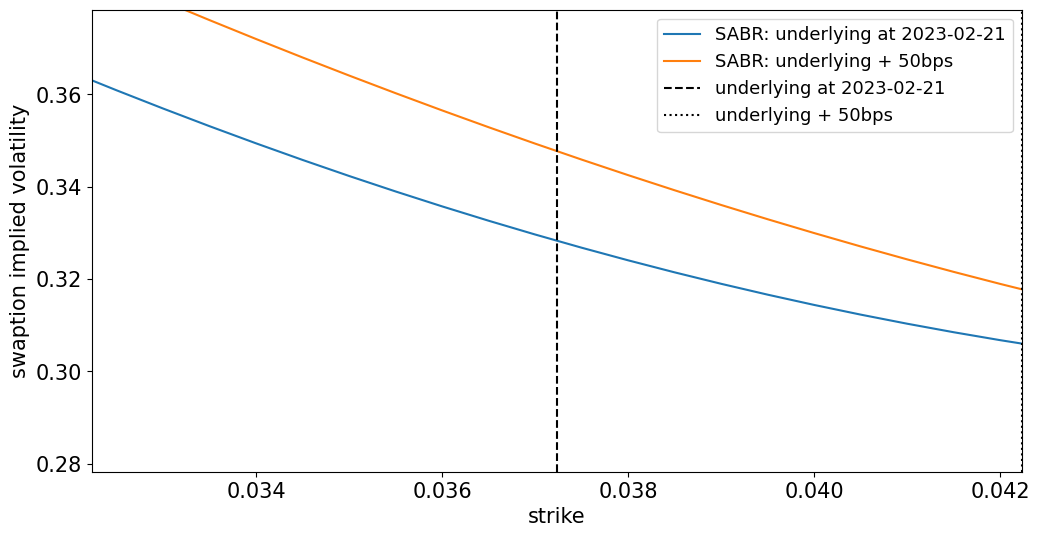

In [33]:
warnings.filterwarnings('ignore')
DATE = '2023-02-21'

SHIFT = 50/100/100

sabrcurve.rename(columns={'SABR':f'SABR: underlying at {DATE}'},inplace=True)
if doSLIM:
    sabrcurve[f'SABR: underlying + {SHIFT*100*100:.0f}bps'] = sabr_slim(BETA,nustar,rhostar,F+SHIFT,strikegrid,Topt,volATM)
else:
    sabrcurve[f'SABR: underlying + {SHIFT*100*100:.0f}bps'] = sabr(BETA,nustar,rhostar,alphastar,F+SHIFT,strikegrid,Topt)

fig, ax = plt.subplots()
sabrcurve.plot(ax=ax)
plt.xlim([F-.005,F+.005])
plt.ylim([volATM-.05,volATM+.05])
plt.axvline(F,color='k',linestyle='--',label=f'underlying at {DATE}')
plt.axvline(F+SHIFT,color='k',linestyle=':',label=f'underlying + {SHIFT*100*100:.0f}bps')
plt.ylabel('swaption implied volatility');
plt.xlabel('strike')
plt.legend();

## 2.2

Now, we consider how the volatility may change with the underlying shift of `50bps`.

Using the same SABR parameters from `1.1`, and the strike grid from `1.2`, plot the new SABR curve accounting for the underlying rate shifting up `50bps`.

In [34]:
idloc = (sabrcurve.index.to_series()-fwdswap).abs().idxmin()

newvols = sabrcurve.loc[idloc]
strikeATM = strikes[idstrikeATM]

Frange = F + [0,SHIFT]

In [37]:
period_fwd = curves.index.get_loc(Topt)
period_swap = curves.index.get_loc(Tswap)+1
step = round(freqcurve/freqswap)

discount = curves['discounts'].iloc[period_fwd+step : period_swap : step].sum()/freqswap

blackprices = pd.Series(N * blacks_formula(Topt-np.array([0,1/365]), newvols[0],strikeATM,Frange,discount,isCall=True), index=[DATE,'shift'], name='static').to_frame().T
blackprices.loc['dynamic'] = N * blacks_formula(Topt-np.array([0,1/365]), newvols,strikeATM,Frange,discount,isCall=True)
blackprices.style.format('{:.2f}')

,2023-02-21,shift
static,1.69,2.80
dynamic,1.69,2.90


## 2.3

Calculate the new volatility specifically for the pre-shift ATM strike.

Use this in Black's formula similar to `2.1`, where the only change is the volatility now reflects the shift in the underlying (not the strike).

Report
* the new price
* the change in price divided by `50bps`

In [38]:
delta = (blackprices.diff(axis=1) / SHIFT)['shift'].rename('delta')
delta.to_frame().style.format('{:.2f}')

,delta
static,221.91
dynamic,241.79


## 2.4

How much different is the (dynamic) delta which accounts for the shift in volatility from the (static) delta in `2.1`?

In [39]:
delta_relative_change = delta.pct_change().loc['dynamic']
display(f'Relative change to delta: {delta_relative_change:.2%}.')

'Relative change to delta: 8.96%.'

***